red/white

In [ ]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [1]:
# loading data

import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

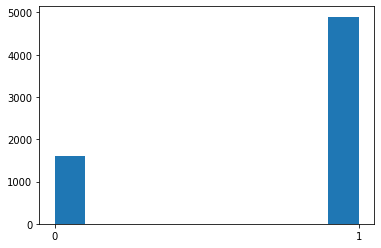

1    4898
0    1599
Name: type, dtype: int64


In [4]:
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts())

In [9]:
# normalize data

print(wine.info())

wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None
   fixed acidity  volatile acidity  citric acid  ...   alcohol   quali

In [10]:
# shuffle data

import numpy as np
wine_shuffle = wine_norm.sample(frac = 1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
435        0.256198              0.08     0.222892  ...  0.608696  0.666667   1.0
1807       0.413223              0.08     0.259036  ...  0.115942  0.500000   1.0
1933       0.280992              0.26     0.391566  ...  0.173913  0.333333   1.0
1292       0.173554              0.21     0.078313  ...  0.637681  0.500000   0.0
4760       0.231405              0.06     0.156627  ...  0.289855  0.500000   1.0

[5 rows x 13 columns]
[[0.25619835 0.08       0.22289157 0.08588957 0.02990033 0.07986111
  0.20967742 0.09427415 0.51162791 0.15168539 0.60869565 0.66666667
  1.        ]
 [0.41322314 0.08       0.25903614 0.2208589  0.0730897  0.20486111
  0.41013825 0.26392905 0.43410853 0.32022472 0.11594203 0.5
  1.        ]
 [0.28099174 0.26       0.39156627 0.11809816 0.12292359 0.09027778
  0.40552995 0.1791016  0.21705426 0.07303371 0.17391304 0.33333333
  1.        ]
 [0.17355372 0.21       0.07831325 0.02760

In [13]:
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]

test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes = 2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes = 2)
print(train_Y[0])
print(test_Y[0])

[0.25619835 0.08       0.22289157 0.08588957 0.02990033 0.07986111
 0.20967742 0.09427415 0.51162791 0.15168539 0.60869565 0.66666667]
1.0
[0.80165289 0.3        0.47590361 0.06441718 0.18438538 0.07638889
 0.16359447 0.28320802 0.35658915 0.30898876 0.72463768 0.33333333]
0.0
[0. 1.]
[1. 0.]


In [15]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 48, activation = 'relu', input_shape = (12, )),
                             tf.keras.layers.Dense(units = 24, activation = 'relu'),
                             tf.keras.layers.Dense(units = 12, activation = 'relu'),
                             tf.keras.layers.Dense(units = 2, activation = 'softmax'),
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.07), loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 48)                624       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_6 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split = 0.25)

Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.1376 - accuracy: 0.9438 - val_loss: 0.0974 - val_accuracy: 0.9808
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 0.9828 - val_loss: 0.0954 - val_accuracy: 0.9846
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9864 - val_loss: 0.1757 - val_accuracy: 0.9600
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0791 - accuracy: 0.9782 - val_loss: 0.2352 - val_accuracy: 0.9085
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9831 - val_loss: 0.0673 - val_accuracy: 0.9838
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9905 - val_loss: 0.0914 - val_accuracy: 0.9846
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9905 - val_loss: 0.0680 - val_accuracy: 0.9792
Epoch 

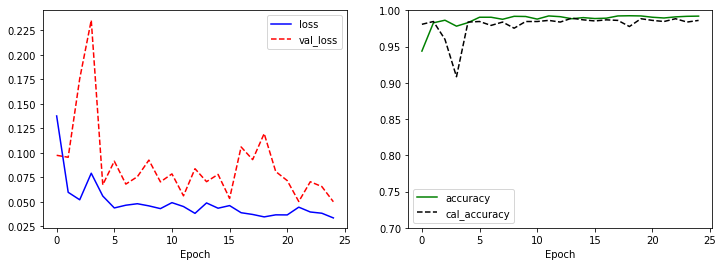

In [18]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'cal_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [23]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.9923


[0.04198287054896355, 0.9923076629638672]